# Multiple Linear Regression
## Bike sharing demand case study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



#### Brief outline of different steps involved in the project:
1. Data reading and understanding - perform exploratory data analysis to understand the data and identify the variables that can be used to predict the demand for shared bikes.
2. Data splitting and visualisation of training data - split the data into training and test sets and visualise the data.
3. Data cleaning and preparation - clean the train/val data and prepare the data for modelling - missing value imputation, dropping unecessary columns, normalising the data, creating dummy variables.
4. Scaling - scale the data to make it more suitable for modelling using min-max scaling or standardisation.
5. Feature selection - select the features that are most important to predict the demand for shared bikes. An approach of manual + automatic feature selection techniques such as RFE, AIC, BIC, etc. could be used to select the features.
6. Modeling - train the model using the selected features.
7. Residual analysis and model evaluation - Perform residual analysis prior to this to understand the residuals and check the assumptions of linear regression. evaluate the model using various metrics like R2, RMSE, etc.
8. Explainability - explain the model using the selected features.


## Step 1: Reading and Understanding the Data

In [51]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datadict

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


In [40]:
bikes = pd.read_csv('day.csv')
bikes.head()        #check the first few rows to get an idea of what the data consists of

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [44]:
#different columns and data dictionary for the columns to better understand what they mean
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [47]:
#read datadict.py and display the data dictionary
data_dict =pd.DataFrame.from_dict(datadict.data_dict, orient='index')
data_dict

,0
instant,record index
dteday,date
season,"season(1:spring,2:summer,3:fall,4:winter)"
yr,"year(0: 2018, 1:2019)"
mnth,month(1 to 12)
holiday,weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
weekday,day of the week
workingday,"if day is neither weekend nor holiday is 1, otherwise is 0"
weathersit,"1. Clear, Few clouds, Partly cloudy, Partly cloudy, 2.Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3.Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
temp,temperature in Celsius


In [48]:
#inspect the shape of the dataframe to get an idea of the number of rows and columns
bikes.shape

(730, 16)

In [50]:
#information about different types of columns - datatype and non null columns
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [53]:
#describe the quantitative variables - mean/median, standard deviation, quartiles. Looking at this gives an idea of distribution of numerical variables.
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data splitting and visualisation

In this step, we will split the data into training data(train+validation) and test data. Reason behind doing this at the very next step is that we would like to keep the test data separate and hidden from the modelling process and not perform any visualisation/analysis on it till the very end.

In [56]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.8, test_size = 0.2, random_state = 100)


We shall use the df_train variable in the following steps to perform any exploratory analysis/visualisation.


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variable

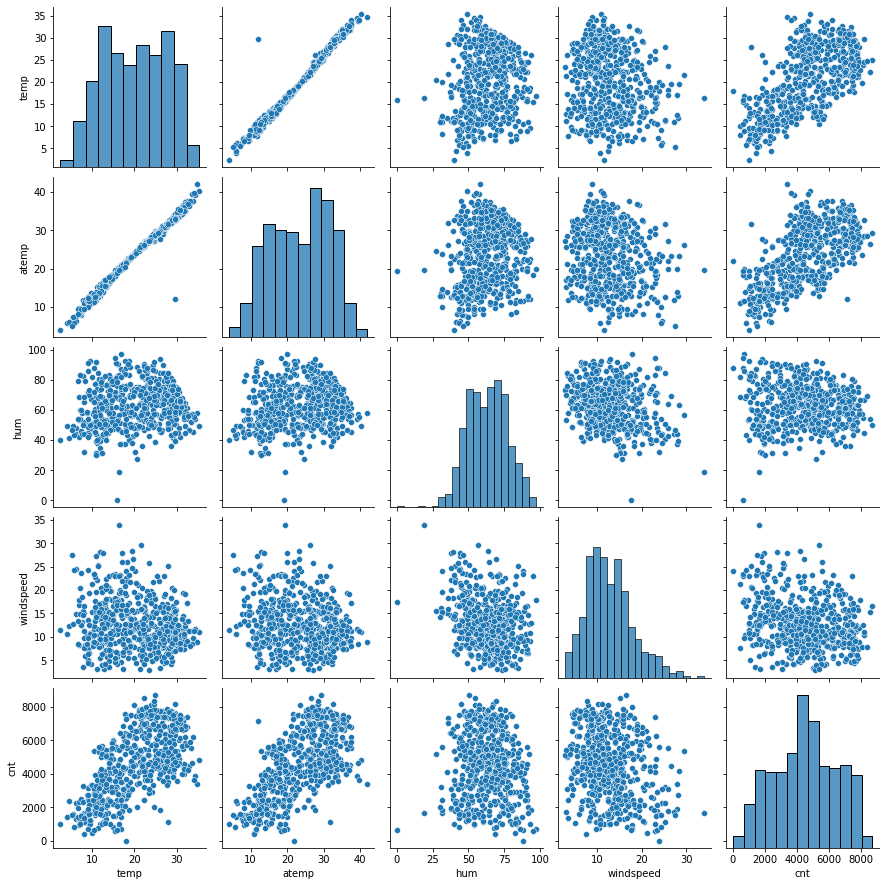

In [69]:
#copy df_train to df_train_copy
df_train_copy = df_train.copy()

#drop columns 'instant', 'dteday', 'registered', 'casual' as they are not needed for visualisation for now.
#we will also drop the columns - season, yr, mnth, holiday, weekday, workingday, weathersit from the visualisation. 
# all of these variables have categories and we will map them to their categories to make it a categorical variable and visualise them.
df_train_copy.drop(['instant', 'dteday', 'registered', 'casual', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], axis = 1, inplace = True)
sns.pairplot(df_train_copy)
plt.show()

In our use case, we're trying to predict the demand/count of bikes(represented by dependent variable 'cnt'). If we look at the pair plots, especially the last row, we can explore some relationships between 'cnt' and other variables in the data.

- Let's take a look at the last row. It shows us variation of count with other variables - temp, actual temp, humidity, windspeed. We can see that variation of count with temperature is somewhat linear, i.e. we can draw a linear line that passes through the datapoints and explain the variation. This trend is same with the actual temp as well, which is expected as the variables might be highly correlated. 

- Humidity and windspeed vs count does not seem as linearly separable. Instead, we see a different distribution of values. Humidity between 30-80 seems to have a majority of the data points. When we move below 25 or past 100, we see fewer data points. There is a similar trend to windspeed as well. 

- We can also see that the count has a median around 4000. The maximum value is around 8000 and the minimum value is around 20. The histogram also looks to follow some sort of a normal distribution pattern. Most of the values (25th percentile to 75th percentile) seems to lie between the range 3100-6000. 

- One more interesting pattern that we can notice is from the actual temp vs temp graphs. We can see that we can draw a perfect straight line that can pass through the points, meaning a perfect linear relationship between the variables. The reason behind this could be that the variables are highly correlated, which we can determine using the correlation coeffecient in the next steps. Knowing this gives us an idea of the variables to keep or drop during modelling.

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

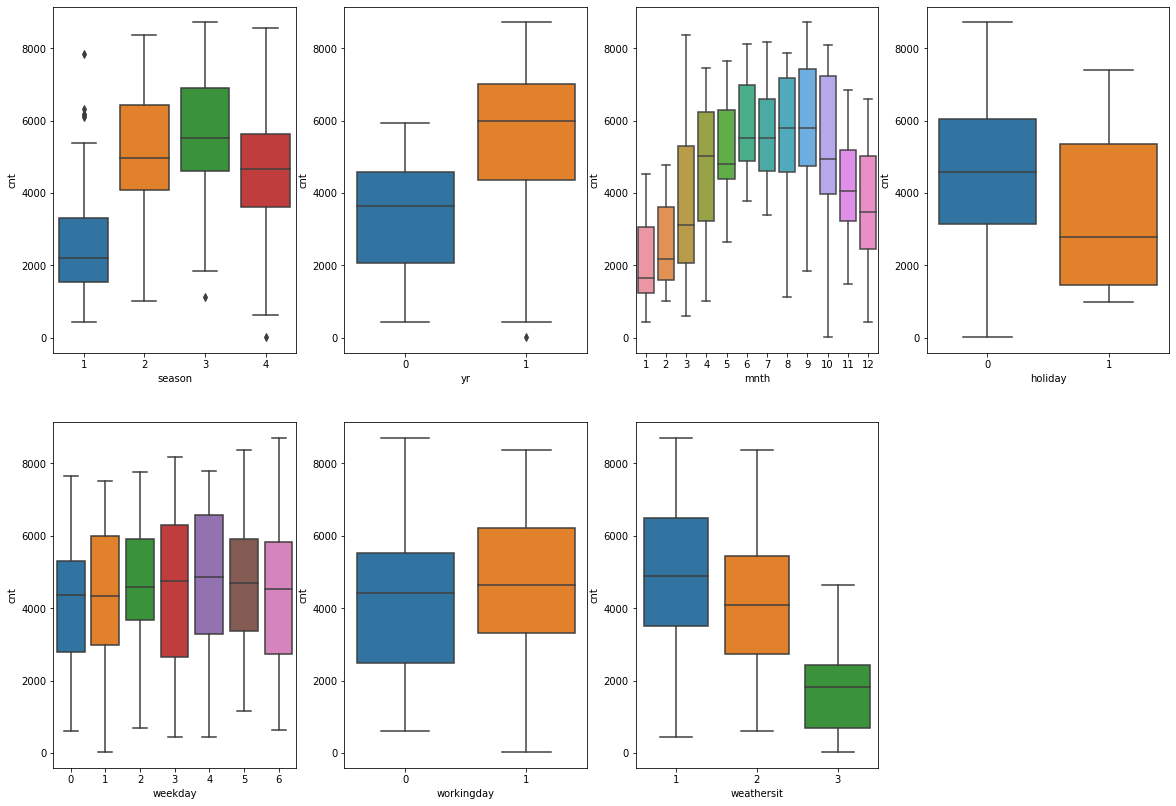

In [73]:
plt.figure(figsize=(20, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_train)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_train, )
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_train)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_train)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_train)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_train)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_train)
plt.show()

- In the first graph, we can see variation of demand with seasons. 2 and 3(summer and fall) have a marginally higher demand with median demand in the range 5000-5500. During the spring and winter seasons, we observe a median demand around 2100 and 4200 respectively. We also observe a similar trend when we observe demand across months. Reason being summer and fall constitute months between 4 and 9 and we see more demand in those months as well. This also means that the variables months and season could be correlated.

- When we compare demand for years 0 and 1(0: 2018, 1: 2019) in the next graph, we see that the demand has risen up for the year 2019. 2018 seems to have around 3800 as the median demand whereas 2019 has around 6000 bikes as median demand, which is a significant increase. 

- We can also see from the holiday vs count graph that there are more bikes in demand during non-holiday days. A possible reason could be that people are using it to commute to work and hence when it's a public holiday, the demand of these bikes automatically go down.

- From the count vs weathersit graph, we can see that there is a decrease as we move each level on the x axis. 1(clear, few clouds, partly cloudy) has the maximum median demand, which is slightly under 5000. Reason behind that more people that have taken a bike when the weather is relatively clear and stable. The median demand decreases to around 4000 for 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and to around 2000 for 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). This means that as the weather gets worse and not suitable for riding, people have and are less likely to take a bike.


## Step 3: Data cleaning and preparation